In [34]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

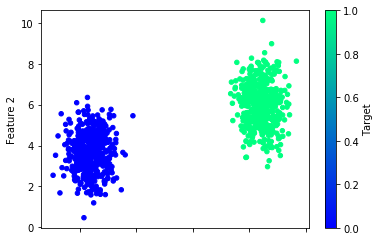

In [35]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [36]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [17]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [18]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [19]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 890us/sample - loss: 0.7748 - accuracy: 0.1480
Epoch 2/100
750/750 [==============================] - 0s 58us/sample - loss: 0.7637 - accuracy: 0.1440
Epoch 3/100
750/750 [==============================] - 0s 55us/sample - loss: 0.7537 - accuracy: 0.1467
Epoch 4/100
750/750 [==============================] - 0s 57us/sample - loss: 0.7453 - accuracy: 0.1600
Epoch 5/100
750/750 [==============================] - 0s 58us/sample - loss: 0.7378 - accuracy: 0.1720
Epoch 6/100
750/750 [==============================] - 0s 55us/sample - loss: 0.7313 - accuracy: 0.1813
Epoch 7/100
750/750 [==============================] - 0s 55us/sample - loss: 0.7259 - accuracy: 0.1973
Epoch 8/100
750/750 [==============================] - 0s 60us/sample - loss: 0.7210 - accuracy: 0.2053
Epoch 9/100
750/750 [==============================] - 0s 57us/sample - loss: 0.7169 - accuracy: 0.2160
Epoch 10/100
750/750 [====================

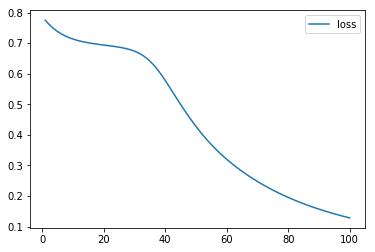

In [27]:
# Create a dataframe containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

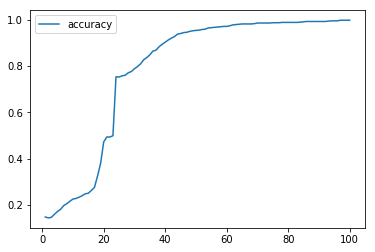

In [28]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/1 - 0s - loss: 0.1261 - accuracy: 1.0000
Loss: 0.11921700513362884, Accuracy: 1.0


In [39]:
# Predict the classifcation of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

nn_model.predict_classes(new_X)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

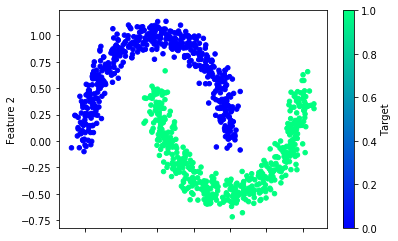

In [43]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the non-linear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [47]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [48]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 172us/sample - loss: 0.3909 - accuracy: 0.8133
Epoch 2/100
750/750 [==============================] - 0s 58us/sample - loss: 0.3877 - accuracy: 0.8173
Epoch 3/100
750/750 [==============================] - 0s 61us/sample - loss: 0.3845 - accuracy: 0.8173
Epoch 4/100
750/750 [==============================] - 0s 68us/sample - loss: 0.3813 - accuracy: 0.8173
Epoch 5/100
750/750 [==============================] - 0s 60us/sample - loss: 0.3780 - accuracy: 0.8227
Epoch 6/100
750/750 [==============================] - 0s 57us/sample - loss: 0.3748 - accuracy: 0.8240
Epoch 7/100
750/750 [==============================] - 0s 51us/sample - loss: 0.3715 - accuracy: 0.8253
Epoch 8/100
750/750 [==============================] - 0s 57us/sample - loss: 0.3685 - accuracy: 0.8253
Epoch 9/100
750/750 [==============================] - 0s 56us/sample - loss: 0.3653 - accuracy: 0.8253
Epoch 10/100
750/750 [====================

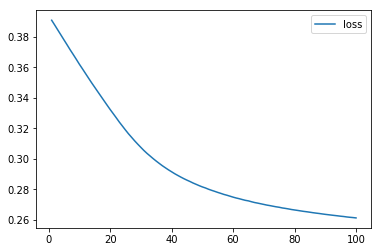

In [49]:
# Create a dataframe containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

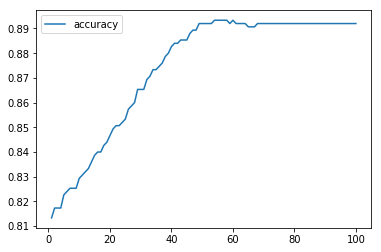

In [50]:
# Plot the loss
history_df.plot(y="accuracy")

In [65]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [66]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [67]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 849us/sample - loss: 0.5888 - accuracy: 0.7867
Epoch 2/100
750/750 [==============================] - 0s 58us/sample - loss: 0.5597 - accuracy: 0.8160
Epoch 3/100
750/750 [==============================] - 0s 61us/sample - loss: 0.5313 - accuracy: 0.8400
Epoch 4/100
750/750 [==============================] - 0s 54us/sample - loss: 0.5035 - accuracy: 0.8587
Epoch 5/100
750/750 [==============================] - 0s 56us/sample - loss: 0.4767 - accuracy: 0.8640
Epoch 6/100
750/750 [==============================] - 0s 53us/sample - loss: 0.4513 - accuracy: 0.8627
Epoch 7/100
750/750 [==============================] - 0s 50us/sample - loss: 0.4277 - accuracy: 0.8640
Epoch 8/100
750/750 [==============================] - 0s 54us/sample - loss: 0.4057 - accuracy: 0.8627
Epoch 9/100
750/750 [==============================] - 0s 54us/sample - loss: 0.3859 - accuracy: 0.8667
Epoch 10/100
750/750 [====================